## Introductory Tutorial on M++

### Getting started

### Exercise 1 (Installation)

In [1]:
import sys
sys.path.append('../..')

import python.mppy as mppy
from plotting import *
import pandas as pd

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- PROJECT_BINARY_DIR= /home/corallo/git/mpp/build
-- PROJECT_SOURCE_DIR= /home/corallo/git/mpp
-- PROJECT_MPP_DIR=    /home/corallo/git/mpp
-- Option:     BUILD_UQ= OFF   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     CONST_GEOMETRIC_TOLERANCE= 1e-10   (using cached value)
-- Option:     CONST_NEAR_ZERO= 1e-15   (using cached value)
-- Option:     CONST_VERY_LARGE= 1e30   (using cached value)
-- Option:     CONST_INFTY= 1e100   (using cached value)
-- Option:     SPACE_DIM= 3   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cache

0

### Exercise 2 (Plotting vtu-files)

By executing the run method, ```M++``` is exectued and computes a simple Laplace problem in 2D.

In [2]:
mpp.run(4, "TUT_laplace")  # Runs Mpp on 4 kernels


================ running  mpp ================

start program on 4 procs at Thu Dec 28 14:27:42 2023
Running on: corallo-ThinkPad-P51
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearP

0

The results of the computation above are saved in the Vtk file format. More precise Unstructured Meshes are used. The files can be found in 'build/data/vtu/'.

In [3]:
import os
sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))

['flux',
 'flux.pvtu',
 'kappa',
 'kappa.pvtu',
 'u',
 'u.pvtu',
 'u_error',
 'u_error.pvtu',
 'u_ex',
 'u_ex.pvtu']

Each file contains different information, for example 'u.pvtu' holds the solution.
Vtu files can be visualized in many ways, two pleasant options that we would like to highlight are the use of Paraview or the direct processing using the python module vtk as shown below.

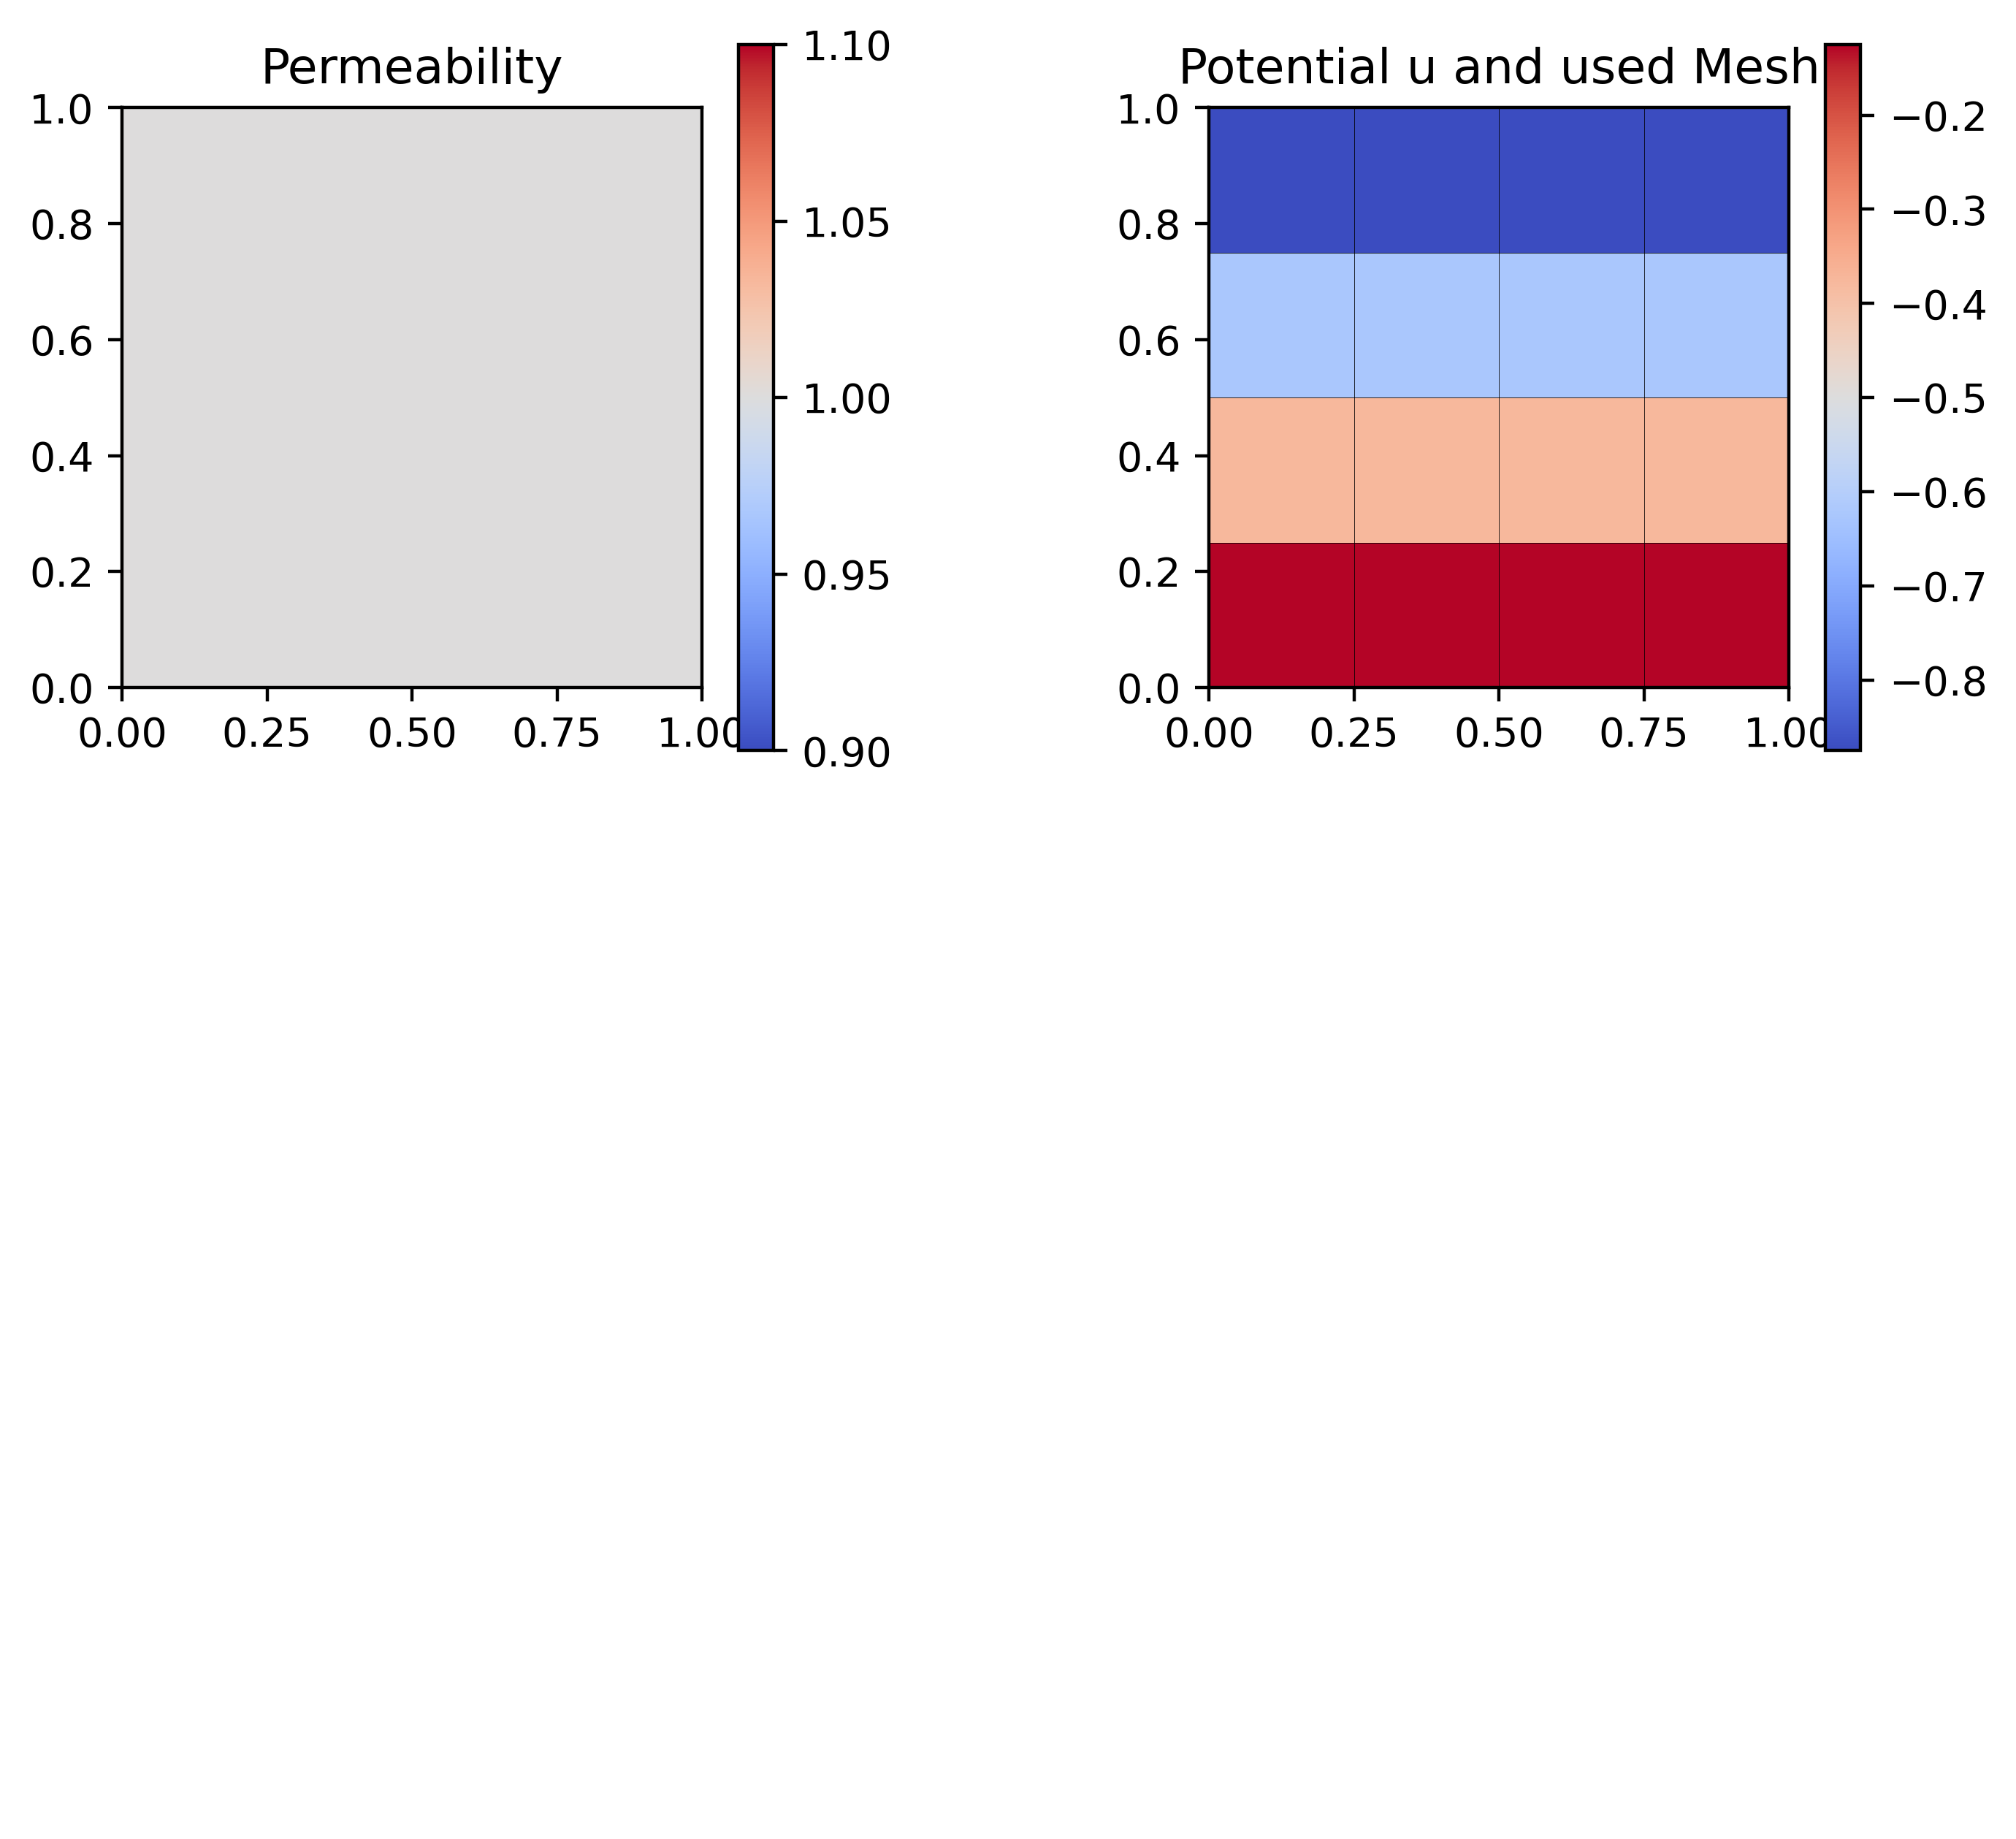

In [4]:
summarize_plot(mpp)

The plots are very customizable, the source code of the example above can be found at ```mpp/python/vtu_utilities.py``` and ```python/plotting.py```. 
The general reading and plotting routines can be found in ```mpp/python/vtu_utilities.py```, whereas some default configurations as the ```summarize_plot``` method can be found in ```python/plotting.py```.
Another more simple example below shows how to configure plots.

Important Note: The differentiation between Unstructured Meshes with Point Data (values at each vertex) and Cell Data (values in each cell) is one of the most important steps while generating plots. However in most cases the function add_vtu does the for each type of unstructured grid data intended visualisation. 

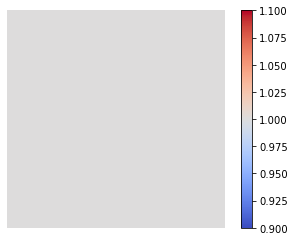

In [5]:
p = mpp.vtu_plot()
p.add_vtu('kappa.pvtu', cb=True) 

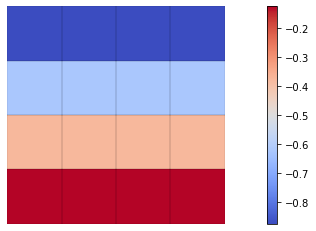

In [6]:
p = mpp.vtu_plot()
p.add_vtu('u.pvtu', cb= True, add_mesh=True, mesh_linewidth=0.1) 

However in mpp.vtu_utilities there are some more functions than the default ones. As an example an interpolated version for point data is shown, which is useful for plots on coarse grids.

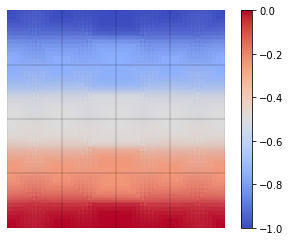

In [7]:
p = mpp.vtu_plot()
p.add_mesh('u.pvtu', point_data=True, linewidth=0.1) 
p.add_point_data_interpolation('u.pvtu', cb=True, fading_stairs = 20) #Point Data plotted with interpolation 

### Exercise 3 (Trying out different geometries)

Now, different geometries and different levels of discretization are tried out and plotted.

In [8]:
kwargs = {"Problem":"Laplace2D", "level": 4}
mpp.run(4, config="TUT_laplace",kwargs=kwargs)  


================ running  mpp ================

start program on 4 procs at Thu Dec 28 14:28:01 2023
Running on: corallo-ThinkPad-P51
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 4
     LinearEpsilon: ........................... 1e-8
     LinearP

0

In [ ]:
summarize_plot(mpp, quiver_filter=2, quiver_scale=0.15)

In [ ]:
kwargs = {"Problem":"LaplaceSquare500", "level":2}
mpp.run(4, config="TUT_laplace", kwargs=kwargs)  

In [ ]:
summarize_plot(mpp, quiver_filter=4, quiver_scale = 0.05,no_mesh = True)

On fine meshes, mesh plotting might be slow. Therefore one can plot with ```no_mesh = True```. Another method in ```python/plotting.py``` is given with ```perm_solution_plot()```, which is only plotting the permeability and the solution.

In [ ]:
perm_solution_plot(mpp)

### Parsing information of the solution

1. Parsing a single run

In [ ]:
mpp.mute = True
mpp.reset_data()

mpp.run(4, config="TUT_laplace", kwargs={"level":3})
mpp.parse_json()

2. Parsing multiple runs

We can use this to parse the output of mpp and generate tables for example with pandas. The data of each run is saved in ``` mpp.data ```. We can mute the output of mpp with ``` mpp.mute = True ```.

In [ ]:
mpp.mute = True
columns = [
    "Mesh Info.Level",
    "Config Info.Problem",
    "Mixed Info.Calculated Inflow",
    "Mixed Info.Calculated Outflow",
    "Mixed Info.Flux Loss",
    "Exact Solution Info.Flux Error",
    "Computation Time"
]

for level in range(3,7): 
    mpp.run(4, config="TUT_laplace", kwargs={"level":level})
    mpp.parse_json()
    
pd.DataFrame(pd.json_normalize(mpp.data),columns=columns)

With ``` mpp.reset_data()``` we can reinitialize ```mpp.data``` again.

In [ ]:
mpp.reset_data()
mpp.data

3. Additional Entries (for parse_log)

With the parameter ```additional_entries``` in ```mpp.parse_log()``` we can parse additional information into  ```mpp.data```.

In [9]:
mpp.mute = True
mpp.reset_data()

columns = ["Level","Problem","Computation Time","run","Experiment"]
adds = {'run':1,'Experiment':'tutorial'}

mpp.run(4, config="TUT_laplace", kwargs={"level":3})
mpp.parse_log(additional_entries = adds)
pd.DataFrame(mpp.data,columns=columns)

,Level,Problem,Computation Time,run,Experiment
0,"[3.0, -1.0, 0.0]","[2.0, 2.0]",0.02 seconds,1,tutorial
